In [ ]:
import numpy as np

rng = np.random.default_rng(seed=42)
m = 200
X = 2*rng.random((m,1)) # Draws nos from the uniform distribution
y = 4 + 3*X + rng.standard_normal((m,1)) # Draws nos from gaussian/normal distribution with mean=0,std=1


In [10]:
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (200, 1)
y shape: (200, 1)


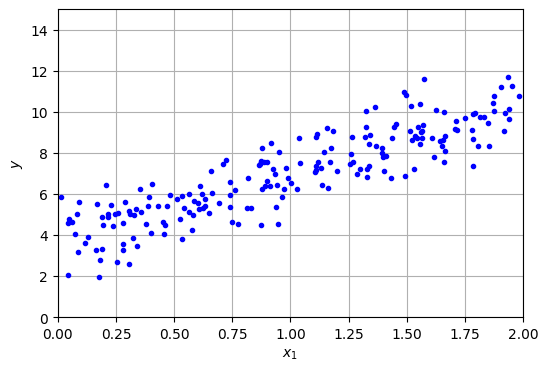

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel("$x_1$") #$$ latex style math
plt.ylabel("$y$")
plt.axis([0,2,0,15])
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
print("X_b shape:",X_b.shape)
print(f"X_b.T shape:{X_b.T.shape}, X shape:{X_b.shape}")
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
# inv((2,200) @ (200,2)) @ (2,200) @ (200,1)
# inv(2,2) @ (2,1) 
# out shape:(2,1)
print(theta_best)

X_b shape: (200, 2)
X_b.T shape:(2, 200), X shape:(200, 2)
[[3.69084138]
 [3.32960458]]


In [15]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 3.69084138],
       [10.35005055]])

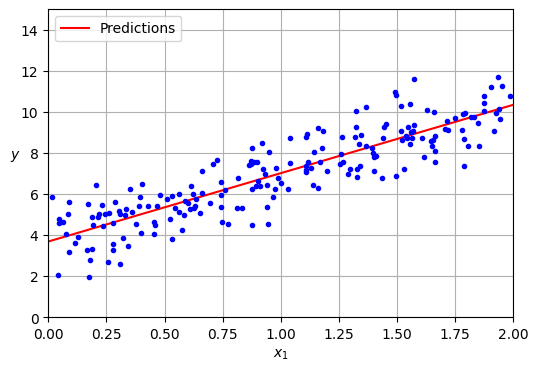

In [17]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict,'r-',label="Predictions")
plt.plot(X,y,'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()



In [18]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.coef_,lin_reg.intercept_)

[[3.32960458]] [3.69084138]


In [20]:
print(X_new)

[[0]
 [2]]


In [19]:
lin_reg.predict(X_new)

array([[ 3.69084138],
       [10.35005055]])